<a href="https://colab.research.google.com/github/kiharalab/OC_Finder/blob/main/OC_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OC_Finder
<a href="https://github.com/marktext/marktext/releases/latest">
   <img src="https://img.shields.io/badge/OC_Finder-v1.0.0-green">
   <img src="https://img.shields.io/badge/platform-Linux%20%7C%20Mac%20-green">
   <img src="https://img.shields.io/badge/Language-python3-green">
   <img src="https://img.shields.io/badge/dependencies-tested-green">
   <img src="https://img.shields.io/badge/licence-GNU-green">
</a>       


OF_Finder is a computational tool using deep learning for osteoclast segmentation, classification, and counting.

Copyright (C) 2021 Xiao Wang*, Mizuho Kittaka*, Yilin He, Yiwei Zhang, Yasuyoshi Ueki, Daisuke Kihara, and Purdue University.

License: GPL v3 for academic use. (For commercial use, please contact us for different licensing.)

Contact: Daisuke Kihara (dkihara@purdue.edu)


**We strongly suggest to use Google Chrome for OC_Finder Colab version. Other browsers such as Safari may raise errors when uploading or downloading files.**

For more details, see **<a href="#Instructions">Instructions</a>** of the notebook and checkout the **[OC_Finder GitHub](https://github.com/kiharalab/OC_Finder)**. If you use OC_Finder, please cite it: **<a href="#Citation">Citation</a>**.

## Protocol of OC_Finder
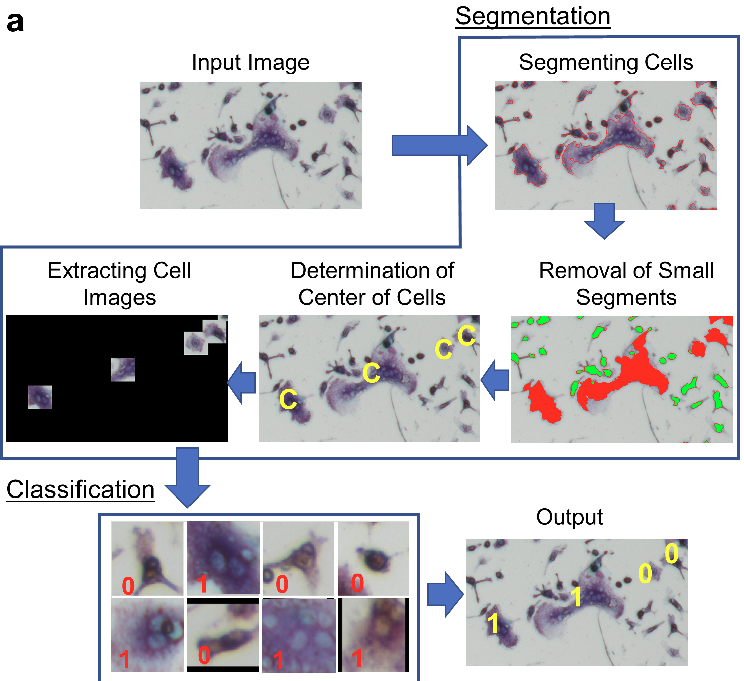

## Classification Network Architecture
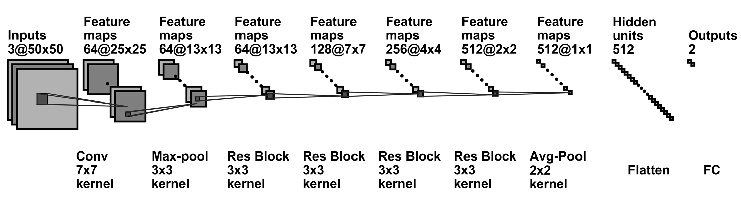

# Instructions <a name="Instructions"></a>
**Quick start**
1. Connect to a gpu machine by clicking the right top button **"Connect"** in the notebook, then we can run OC_Finder under GPU support.
2. Click the left running button in <a href="#Dependency">Install Dependencies</a> to install dependencies.
3. Upload your microscopy image by clicking the left running button in <a href="#Image">Upload Microscopic Image</a>. If you want to use our example, then choose the box **use_author_example**.
4. Config the parameters in <a href="#Param">Param</a> and then click the left running button to confirm it. We suggest to use the default settings to run.
5. Run OC_Finder by clicking the left running button in <a href="#Running">Run OC_Finder</a>
6. (Optional) Click the left running button in <a href="#Download">Download</a> to download the zip files. All the intermediate results will be saved in the zip file.
7. Visualize detection results by clicking the left running button in <a href="#Visualization">Visualization</a>


#Run OC_Finder Online

In [ ]:
#@title Install dependencies <a name="Dependency"></a>
#@markdown Please make sure the notebook is already connected to **GPU**, OC_Finder needs GPU support to run.<br>
#@markdown Click the right top button **"Connect"**, then the notebook will automatically connect to a gpu machine
# %cd /content
# !pip install pip3-autoremove
# remove "somepackage" plus its dependencies:

# !pip-autoremove numpy -y
# !pip-autoremove pandas -y
# !pip-autoremove matplotlib -y
# !pip-autoremove Pillow -y
# !pip-autoremove opencv-python -y
# !pip-autoremove torch -y
# !pip install numpy==1.18.2
# !pip install pandas==1.0.3
# !pip install matplotlib==3.2.1
# !pip install Pillow==6.2.2
# !pip install opencv-python==4.1.2.30
# !pip install torch==1.5.1 torchvision==0.6.1
# !pip install torch==1.1.0
#!pip install https://download.pytorch.org/whl/cu100/torch-1.1.0-cp37-cp37m-linux_x86_64.whl
# !rm -rf OC_Finder
# !git clone https://github.com/kiharalab/OC_Finder --quiet
# %cd OC_Finder
# !pip install -q condacolab
# !python3 -c "import condacolab;condacolab.install()"
# !eval "$(conda shell.bash hook)"
# !conda create -n OC_Finder python=3.6.9
# !conda activate OC_Finder

# !pip install -r requirement.txt
%%shell
cd /content
rm -rf OC_Finder
git clone https://github.com/kiharalab/OC_Finder --quiet
cd OC_Finder
pip install -q condacolab
python3 -c "import condacolab;condacolab.install()"
eval "$(conda shell.bash hook)"
conda create -n OC_Finder python=3.6.9
conda activate OC_Finder
pip install numpy==1.18.2
pip install pandas==1.0.3
pip install matplotlib==3.2.1
pip install Pillow==6.2.2
pip install opencv-python==4.1.2.30
pip install torch==1.5.1 torchvision==0.6.1
pip install ipykernel

In [ ]:
#@title Input Microscopic Image <a name="Image"></a>
#@markdown Please follow the instructions to upload your **Microscopice Image** file.

#@markdown If you have not prepared the example by yourself, you can use author's example to have a test. To do that, please select the following choice.
from google.colab import files
import os
import os.path
import re
import hashlib
use_author_example = False #@param {type:"boolean"}
if use_author_example:
  image_input_path = os.path.join("/content/OC_Finder","example")
  image_input_path = os.path.join(image_input_path,"input")
  image_input_path = os.path.join(image_input_path,"input_example.tif")

else:
  image_input = files.upload()

  for fn in image_input.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(image_input[fn])))
    image_input_path = os.path.abspath(fn)
    print("Uploaded image is saved in: %s"%image_input_path)

In [ ]:

from google.colab import files
import os
import os.path
import re
import hashlib
#@title Specify other parameters(Default is recommended) <a name="Param"></a>
run_type = '0' #@param {type:"string"}
# @markdown   ```run_type is used to specify the input image condition```<br>``` 0: common setting;```<br>``` 1: enable user to tune segmentation parameter for images with large cells; ```
remove_pixel = '500' #@param {type:"string"}
#@markdown ```remove_pixel is used to remove segmentation area with size<remove_pixel, default:500```
#@markdown ### Optional param for resizing

resize = '0'#@param {type:"string"}
#@markdown ```resize control flag: resize the input to adjust the resolution to be: 50 pixels are equivalent to 38um```
resize_height = '0'#@param {type:"string"}
#@markdown ```resize_height: the resized output image height, which only will be enabled when ```**resize=1**```. User needs to make sure that resizing output resolution: 50 pixels are equivalent to 38um```
resize_width = '0'#@param {type:"string"}
#@markdown ```resize_width: the resized output image width, which only will be enabled when ```**resize=1**```. User needs to make sure that resizing output resolution: 50 pixels are equivalent to 38um```

#@markdown ### Optional param for segmentation
#@markdown Here the parameters can only work when you set **run_type=1**
filter_size= '3'#@param {type:"string"}
#@markdown ```filter_size specifies your filter for segmentation, usually we choose an integer value in range [1,10]```
threshold = '195'#@param {type:"string"}
#@markdown ```threshold specifies your threshold for segmentation, usually we choose an integer value in range [150,210].```
command_line=f'python main.py --mode=0 -F "{image_input_path}"  -M "best_model/ema_best.pth.tar" --type {run_type} --remove_pixel {remove_pixel} --filter_size {filter_size} --threshold {threshold} --resize {resize} --resize_height {resize_height} --resize_width {resize_width}'
print("Configure command:",command_line)
#write it to a running file
with open("/content/OC_Finder/run.sh","w") as file:
  file.write("%s"%command_line)

In [ ]:
#@title Run OC_Finder <a name="Running"></a>
#@markdown Please allow 1 minutes to get the output, while some big microscopy image may takes a little longer, but should be within 5 minutes

%%shell
cd /content/OC_Finder
git pull origin main
eval "$(conda shell.bash hook)"
conda activate OC_Finder
bash /content/OC_Finder/run.sh

In [ ]:

%cd /content/OC_Finder/
#@title Download Estimation Output <a name="Download"></a>
#@markdown The pdb file with estimated score will be compressed and downloaded. You can visualize your structure score by Pymol.
from google.colab import files
import os, tarfile
import shutil
import zipfile
zip_format = True #@param {type:"boolean"}
#@markdown If you want to download tar.gz format file, please not choose **zip_format** box.
def init_save_path(input_img_path,filter_size,threshold,remove_pixel):
    """
    :param input_img_path:
    :param params:
    :return:
    save path for segmentation and classification
    image name includes param information
    """
    log_path = os.path.join(os.getcwd(), 'Predict_Result')
    split_path = os.path.split(input_img_path)
    origin_img_name = split_path[1][:-4]
    log_path = os.path.join(log_path, split_path[1])
    log_path = os.path.join(log_path, "Filter_" + str(filter_size))
    log_path = os.path.join(log_path, "threshold_" + str(threshold))
    log_path = os.path.join(log_path, "Removepixel_" + str(remove_pixel))
    return log_path
user_download_path = init_save_path(image_input_path,filter_size,threshold,remove_pixel)
split_path = os.path.split(image_input_path)
origin_img_name = split_path[1][:-4]
tmp_download_dir = os.path.join(os.getcwd(),"tmp")
if not os.path.exists(tmp_download_dir):
  os.mkdir(tmp_download_dir)
os.system("rm "+str(tmp_download_dir)+"/*")
for item in os.listdir(user_download_path):
  cur_path = os.path.join(user_download_path,item)
  if os.path.isdir(cur_path):
    continue
  shutil.copy(cur_path,os.path.join(tmp_download_dir,item))
if zip_format:
  tar_path = os.path.join(os.getcwd(),origin_img_name+"_ocfinder.zip")
else:
  tar_path = os.path.join(os.getcwd(),origin_img_name+"_ocfinder.tar.gz")
def zip_file(tar_path,src_dir):
    zip_name = tar_path
    z = zipfile.ZipFile(zip_name,'w',zipfile.ZIP_DEFLATED)
    for dirpath, dirnames, filenames in os.walk(src_dir):
        fpath = dirpath.replace(src_dir,'')
        fpath = fpath and fpath + os.sep or ''
        for filename in filenames:
            z.write(os.path.join(dirpath, filename),fpath+filename)
            print ('==Compress Success!==',filename)
    z.close()

def make_targz(output_filename, source_dir):
    """
    :param output_filename:
    :param source_dir:
    :return: bool
    """
    try:
        with tarfile.open(output_filename, "w:gz") as tar:
            tar.add(source_dir, arcname=os.path.basename(source_dir))

        return True
    except Exception as e:
        print(e)
        return False
if zip_format:
  zip_file(tar_path,tmp_download_dir)
else:
  make_targz(tar_path,tmp_download_dir)
files.download(tar_path)

#@markdown Please check final detection results in "Detailed_Segment_Predict_Final.png". Also, we kept the detection results in txt file for more details.


In [ ]:
#@title Detection Visualization <a name="Visualization"></a>
def init_save_path(input_img_path,filter_size,threshold,remove_pixel):
    """
    :param input_img_path:
    :param params:
    :return:
    save path for segmentation and classification
    image name includes param information
    """
    log_path = os.path.join(os.getcwd(), 'Predict_Result')
    split_path = os.path.split(input_img_path)
    origin_img_name = split_path[1][:-4]
    log_path = os.path.join(log_path, split_path[1])
    log_path = os.path.join(log_path, "Filter_" + str(filter_size))
    log_path = os.path.join(log_path, "threshold_" + str(threshold))
    log_path = os.path.join(log_path, "Removepixel_" + str(remove_pixel))
    return log_path
user_download_path = init_save_path(image_input_path,filter_size,threshold,remove_pixel)
figure_path = os.path.join(user_download_path,"Detailed_Segment_Predict_Final.png")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.clf()
plt.figure(figsize=(20,20))
img = mpimg.imread(figure_path)
imgplot = plt.imshow(img)
plt.show()
#@markdown Here the red boxes denote positive detections, while the blue boxes denote negative detections.

## Citation: <a name="Citation"></a>

Xiao Wang*, Mizuho Kittaka*, Yilin He, Yiwei Zhang, Yasuyoshi Ueki & Daisuke Kihara. OC_Finder: A deep learning-based software for osteoclast segmentation, classification, and counting. (2021).

```
@article{wang2021oc_finder,   
  title={OC_Finder: A deep learning-based software for osteoclast segmentation, classification, and counting},   
  author={Xiao Wang*, Mizuho Kittaka*, Yilin He, Yiwei Zhang, Yasuyoshi Ueki, and Daisuke Kihara},    
  journal={Frontiers in Bioinformatics (Submitted)},    
  year={2021}    
}   
```
